# Design your ML project


## 1. **Frame the project**

* Motivate the need for Machine Learning in your scientific project. 

Perform litterature review of the scientific outstanding questions and solutions proposed in the literature. What would be the steps to solve the problem manually? What are the limitations of the current solutions? Will a new ML algorithm be generalizable enough to be applied to 10+ other research problems? What is the 5-10 year potential of the particular problem given new technology, new research facility, new societal relevance? Are there comparable problems for which the tools can be reused?

* What is the state of the data?

Is there a lot of data, and labeled data? Is there human expertise available? Will this be a supervised or unsupervised learning problem? Can the data be accessed from open-access archives that meet FAIR guidelines? what would be its DOI?


## 2. **Organize the project**

Start a github, a readme, create an environment with a YML file, human and machine readible files and folder.  Make sure the project name has not been used before.

## 3. **Download the data**

List the data, data information, data labels, data provenance (including accessibility from open access data archives)? How large is the data? What data format would be optimal to be read across languages (python, C, R, matlab, julia etc), can it store metadata, how does it perform with I/O?

Is the data geospatial, or time series?

Find appropriate compute platform to storage and I/O of the data (cloud computing, institutional linux cluster etc).

Create a jupyter notebook to document data download and storage.

## 4. **Data preparation**


* Explore the data 

create a jupyter notebook to preliminary data exploration. Document:
- The name, the data type
- The noise: what is the type of noise (stochastic, outliers etc, data gas)
- Data distribution: gaussian, uniform, logarithmic etc.
- Data labels (or target attributes)


Visualize a subset of the data.

Study basic data correlationd between attributes.

How would you solve the problem manually given this data.

Identify transformation that may be useful (such as STFT, CWT, PCA etc...)

Save preliminary plots and notebooks. Document finding.

* First data manipulation

Copy the data and work on these copies.

Write functions for all data transformation so that they can be automatically called (and easily debugged). These functions will be used for training, validating, and test sets.

**Clean data**: fix or remove outliers, fill missing values (zero, mean median) or drop data (when too many data gaps for instance).
Save the clean copy of the data in a different file.

Avoidusing toy, simple synthetic data. Try and use dataset that are collected from the real-world. The behavior of the algorithm may be completely different.

* Feature preparation

**Drop** attributes that are not useful for the task.

**Transform** features (such as STFT, ...)

Explore quick and promising features (e.g. PGA for ground motions)

**Scale** the feature to standardize or normalize. ML algorithms will not perform well in most cases without normalization of the input feature or data. Scaling is not a requirement but it tends to improve the training behavior.
+ *Min-max scaling*: removes the minimal value, then normalize by the maximum value of the distribution so that the amplitudes range between 0 and 1. It is appropriate when the features are positive numbers. The scikit-learn built in function ``sklearn.preprocessing.MinMaxScaler()`` performs:

<code>X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))</code>

<code>X_scaled = X_std * (max - min) + min</code>
Scikit learn has built in functions to do the scaling.

<class 'list'>
[[-1, 2], [-0.5, 6], [0, 10], [1, 18]]
<class 'numpy.ndarray'>
[[0.   0.  ]
 [0.25 0.25]
 [0.5  0.5 ]
 [1.   1.  ]]


(array([ 6., 10., 19., 17., 17., 15.,  7.,  6.,  2.,  1.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

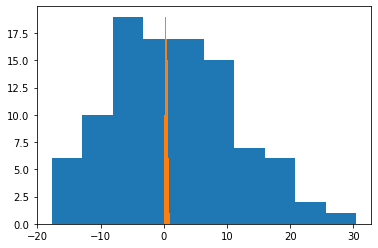

In [26]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
data = [[-1, 2], [-0.5, 6], [0, 10], [1, 18]]
scaler = MinMaxScaler()
scaler.fit(data)# fit the model for data normalization
newdata = scaler.transform(data) # transform the data. watch that data was converted to a numpy array
print(type(data))
print(data)
print(type(newdata))
print(newdata)

# another more direct way is to usee the fit_transform (instead of 2 successive functions)
crap=10*np.random.randn(100)
newdata = scaler.fit_transform(crap.reshape(-1, 1))
plt.hist(crap)
plt.hist(newdata)

+ *Standardization*: removes the mean and divide by the standard deviation. Output distribution does not have bounds. More stable that minmax because it is less sensitive to outliers. The scikit-learn built-in function is ````sklearn.preprocessing.StandardScaler()````

There are other ways to normalize the input feature/data.
https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing




## 5.  **Dimensionality reduction**

Explore possible ways to reduce the dimension of the data. PCA, ICA, ...

Document the data transformation with notebooks. Reassign data attributes/labels in the new coordinates.

## 6. **Model design**

Try several model algorithms. *No free lunch theorem* (Worlpert 1995), there is not such thing as the best learning algorithm. Instead, there is a data set where it is very accurate.

Separate the data in 3 sets:

- The training set (< 66% of data): data set used for training the algorithm
- The validation set (< 33% of data): data set used to tune the model hyperparameters or help design the model structure.
The pair of training and validation sets can be generated using cross-validation for training. Training the same algorithm multiple times with different training-validation sets and with different initial conditions allows to calculate the *expected error* of the learning algorithm, an average of all model estimate errors.
- The test set (~=33%): data set to test model performance of the algorithm.

The model should have the **minumum complexity** that is required to **minimize the model expected error**.

## 7. **Model Training**

Save intermediate results when possible.
Save seens of the random nimber generator to be able to reproduce the results.

Avoid writing your own homewgrown library of codes. Use reliable sources.

Provide good documentation, especially when working in groups.

Start smaller than the final run. It is suggested that no more than 25% of the available resources should be used in the first model design.

Select a performance mesure. For *regression*, performance measures are based on residuals between the prediction and the data values. For *classification*, we will see below that it's a bit more elaborate.


We will explore in later chapters strategies for training.



# Classification

Problems that need a *quantitative* response (numeric value) are **regression** ; problems that need a *qualitative* response (boolean or categorie) are **classification**. *Binary* classification have two output classes. Many statistical methods can be applied to both types of problems.
### #3. Data download

In [28]:
from sklearn.datasets import load_digits,fetch_openml
digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

The data is vector of floats. The target is an integer that is the attribute of the data. How are the data balanced between the classes? How many samples are there per class?

In [55]:
# explore data type
data,y = digits["data"].copy(),digits["target"].copy()
print(type(data[0][:]),type(y[0]))
print(data[0][:])
print(y[0])
print(max(data[0]))
# note that we do not modify the raw data that is stored on the digits dictionary.

<class 'numpy.ndarray'> <class 'numpy.int64'>
[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
0
15.0


(array([178., 182., 177., 183., 181., 182., 181., 179., 174., 180.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

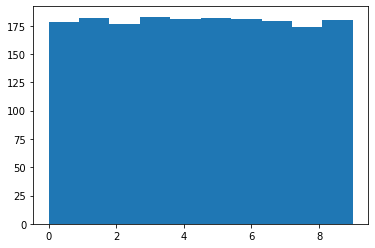

In [59]:
# plot a histogram of the labels to see the balancing of the data among the classes.
plt.hist(y)

 **how many classes are there?**
 Since the classes are integers, we can count the number of classes using the function "unique"

In [98]:
Nclasses = len(np.unique(y))
print(Nclasses)

10


### #4. Data preparation
First print and plot the data.

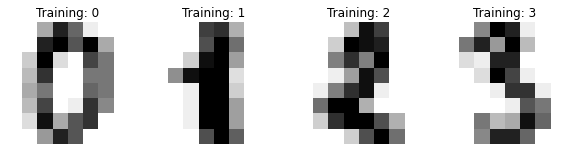

In [99]:
# plot the data
import matplotlib.pyplot as plt
# plot the first 4 data and their labels.
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title('Training: %i' % label)

We look at it and there is little noise and no gap. It's a nicely curated data set. I wish there were more of that for geosciences. Give us some pingos!

### Data re-scaling
We could use MinMaxScaler from sklearn.preprocessing but since the formula for that is (x-min)/(max-min) and our min is 0, we could directly calculate x/max.
(notes from https://www.kaggle.com/recepinanc/mnist-classification-sklearn)
Note that the raw data is still stored in the dictionary ``digits`` and so we can modify the ``data`` variable in place.

In [100]:
print(min(data[0]),max(data[0]))
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit_transform(data)# fit the model for data normalization
newdata = scaler.transform(data) # transform the data. watch that data was converted to a numpy array
print(type(newdata))
print(newdata)

0.0 15.0
<class 'numpy.ndarray'>
[[0.     0.     0.3125 ... 0.     0.     0.    ]
 [0.     0.     0.     ... 0.625  0.     0.    ]
 [0.     0.     0.     ... 1.     0.5625 0.    ]
 ...
 [0.     0.     0.0625 ... 0.375  0.     0.    ]
 [0.     0.     0.125  ... 0.75   0.     0.    ]
 [0.     0.     0.625  ... 0.75   0.0625 0.    ]]


### Train-test split

In [101]:
# Split data into 50% train and 50% test subsets
from sklearn.model_selection import train_test_split
print(f"There are {data.shape[0]} data samples")
X_train, X_test, y_train, y_test = train_test_split(
    data, digits.target, test_size=0.5, shuffle=False)

There are 1797 data samples


### Model design

Here we will use several well known classifiers: Support Vector Machine, k-nearest neighbors, Stochastic Gradient Descent

In [102]:
import sklearn
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
# Support Vector Machine classifier
clf = sklearn.svm.SVC(gamma=0.001) # model design
clf.fit(X_train, y_train) # learn
svc_prediction = clf.predict(X_test) # predict on test
print("SVC Accuracy:", metrics.accuracy_score(y_true=y_test ,y_pred=svc_prediction))

# K-nearest Neighbors
knn_clf = KNeighborsClassifier() # model design
knn_clf.fit(X_train, y_train) # learn
knn_prediction = knn_clf.predict(X_test) # predict on test
print("K-nearest Neighbors Accuracy:", metrics.accuracy_score(y_true=y_test ,y_pred=knn_prediction))

# Random Forest
rf_clf = RandomForestClassifier(random_state=42, verbose=True) # model design
rf_clf.fit(X_train, y_train)# learn
rf_prediction = rf_clf.predict(X_test) # predict on test
print("Random Forest Accuracy:", metrics.accuracy_score(y_true=y_test ,y_pred=rf_prediction))

SVC Accuracy: 0.9688542825361512
K-nearest Neighbors Accuracy: 0.9555061179087876
Random Forest Accuracy: 0.92880978865406


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


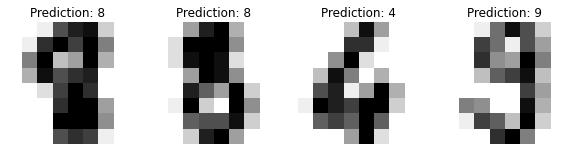

In [86]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, svc_prediction):
    ax.set_axis_off()
    image = image.reshape(8, 8)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    ax.set_title(f'Prediction: {prediction}')

## Classifier Performance

Confusion matrix:
Count the instances that an element of class *A* is classified in class *B*. A 2-class confusion matrix looks like this:

| True Class      | Positive            | Negative           | Total |
|  -------------  |  -----------------  |  --------------- | ----- |
| Positive        | True positive: tp   | False negative: fn | p     |
| Negative        | False positive: fp  | True negative: tn  | n     |
| **Total**       | p'                  | n'                 | N     |

This can be extended for a multi-class classification and the matrix is KxK instead of 2x2. The best confusion matrix is one that is close to identity, with little off diagnoal terms.
Model peformance can be assessed wih the following:
* error = (fp+fn)/N --> 0
* accuracy = (tp + tn)/N = 1 - error --> 1
* tp-rate = tp/p --> 1
* fp-rate = fp/n --> 0
* precision =  tp/p' = tp / (tp + fp) --> 1 (but it ignores the performance in retrieving tn)
* recall = tp/p = tp-rate = tp / (tp + fn) --> 1 (but it ignores the fact that bad values can be retrieve)
* sensitivity = tp/p = tp-rate 
* specificity = tn/n = 1 -fp-rate (how well do we retrieve the negatives)
* F1 score = 2 / (1/ precision + 1/recall) = tp / (tp + (fn+fp)/2) --> 1.
The harmonic mean of teh F1 scores gives more weight to low values. F1 score is thus high if both recall and precision are high.

Support Vector Machine
Classification report for classifier SVC(gamma=0.001):
              precision    recall  f1-score   support

           0       1.00      0.99      0.99        88
           1       0.99      0.97      0.98        91
           2       0.99      0.99      0.99        86
           3       0.98      0.87      0.92        91
           4       0.99      0.96      0.97        92
           5       0.95      0.97      0.96        91
           6       0.99      0.99      0.99        91
           7       0.96      0.99      0.97        89
           8       0.94      1.00      0.97        88
           9       0.93      0.98      0.95        92

    accuracy                           0.97       899
   macro avg       0.97      0.97      0.97       899
weighted avg       0.97      0.97      0.97       899


Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 88  1  0  0  0  0  0  1  1]
 [ 0  0 85  1  0  0  0  0  0  0]
 [ 0  0  0 79  0  3  0  4  5  0]
 [ 0  0  0  

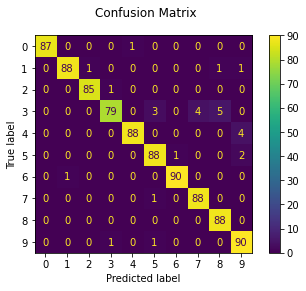

In [87]:
print("Support Vector Machine")
print(f"Classification report for classifier {clf}:\n"
      f"{metrics.classification_report(y_test, svc_prediction)}\n")
disp = metrics.plot_confusion_matrix(clf, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")
plt.show()

K-nearest neighbors
Classification report for classifier KNeighborsClassifier():
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        88
           1       0.95      0.98      0.96        91
           2       0.98      0.93      0.95        86
           3       0.89      0.90      0.90        91
           4       1.00      0.95      0.97        92
           5       0.96      0.98      0.97        91
           6       0.99      1.00      0.99        91
           7       0.95      1.00      0.97        89
           8       0.95      0.90      0.92        88
           9       0.91      0.92      0.92        92

    accuracy                           0.96       899
   macro avg       0.96      0.96      0.96       899
weighted avg       0.96      0.96      0.96       899


Confusion matrix:
[[88  0  0  0  0  0  0  0  0  0]
 [ 0 89  0  0  0  0  0  0  1  1]
 [ 1  0 80  5  0  0  0  0  0  0]
 [ 0  0  1 82  0  2  0  3  2  1]
 [ 0  0  

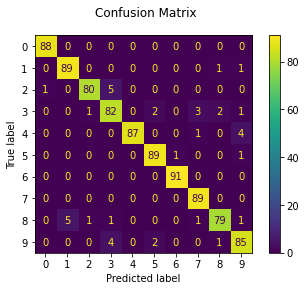

In [88]:
print("K-nearest neighbors")
print(f"Classification report for classifier {knn_clf}:\n"
      f"{metrics.classification_report(y_test, knn_prediction)}\n")
disp = metrics.plot_confusion_matrix(knn_clf, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")
plt.show()

Random Forest
Classification report for classifier RandomForestClassifier(random_state=42, verbose=True):
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        88
           1       0.95      0.89      0.92        91
           2       1.00      0.90      0.94        86
           3       0.87      0.84      0.85        91
           4       0.99      0.91      0.95        92
           5       0.91      0.96      0.93        91
           6       0.98      1.00      0.99        91
           7       0.93      0.98      0.95        89
           8       0.88      0.90      0.89        88
           9       0.84      0.93      0.89        92

    accuracy                           0.93       899
   macro avg       0.93      0.93      0.93       899
weighted avg       0.93      0.93      0.93       899


Confusion matrix:
[[87  0  0  0  1  0  0  0  0  0]
 [ 0 81  0  2  0  1  0  0  0  7]
 [ 1  0 77  6  0  0  0  0  0  2]
 [ 0  1  0 76  0 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


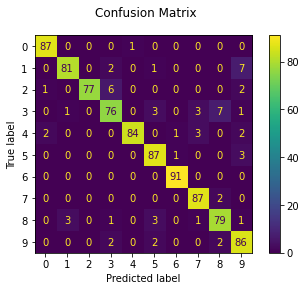

In [90]:
print("Random Forest")
print(f"Classification report for classifier {rf_clf}:\n"
      f"{metrics.classification_report(y_test, rf_prediction)}\n")
disp = metrics.plot_confusion_matrix(rf_clf, X_test, y_test)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")
plt.show()

*ROC* is the receiver operating characteristics curve.

The ROC curve is visual, but we can quantify the classifier performance using the *area under the curve* (aka AUC). Ideally, AUC is 1.

<div>
<img src="roc-curve-v2-glassbox.png" width="500"/>
</div>
[source: https://commons.wikimedia.org/wiki/File:Roc-draft-xkcd-style.svg]

In [91]:
from sklearn.metrics import roc_curve,roc_auc_score

In [103]:
y_score = clf.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(Nclasses):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed